In [ ]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)
project_path = '/content/drive/MyDrive/Football/'
print(f'Currently at {project_path}')

Mounted at /content/drive/
Currently at /content/drive/MyDrive/Football/


In [ ]:
import pandas as pd
import torch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D

In [ ]:
data = pd.read_csv(project_path + 'xG-xA.csv')

In [ ]:
data['dG'] = data['G'] - data['xG']
data['dA'] = data['A'] - data['xA']

team_color = {
    'Liverpool': 'tab:red',
    'Manchester United': 'tab:red',
    'Arsenal': 'tab:red',
    'Brentford': 'tab:red',
    'Southampton': 'tab:red',
    'Chelsea': 'blue',
    'Leicester': 'blue',
    'Brighton': 'blue',
    'Crystal Palace': 'blue',
    'Everton': 'blue',
    'Manchester City': 'turquoise',
    'West Ham': 'purple',
    'Aston Villa': 'purple',
    'Burnley': 'purple',
    'Leeds': 'black',
    'Tottenham': 'black',
    'Newcastle United': 'black',
    'Watford': 'darkgoldenrod'
}

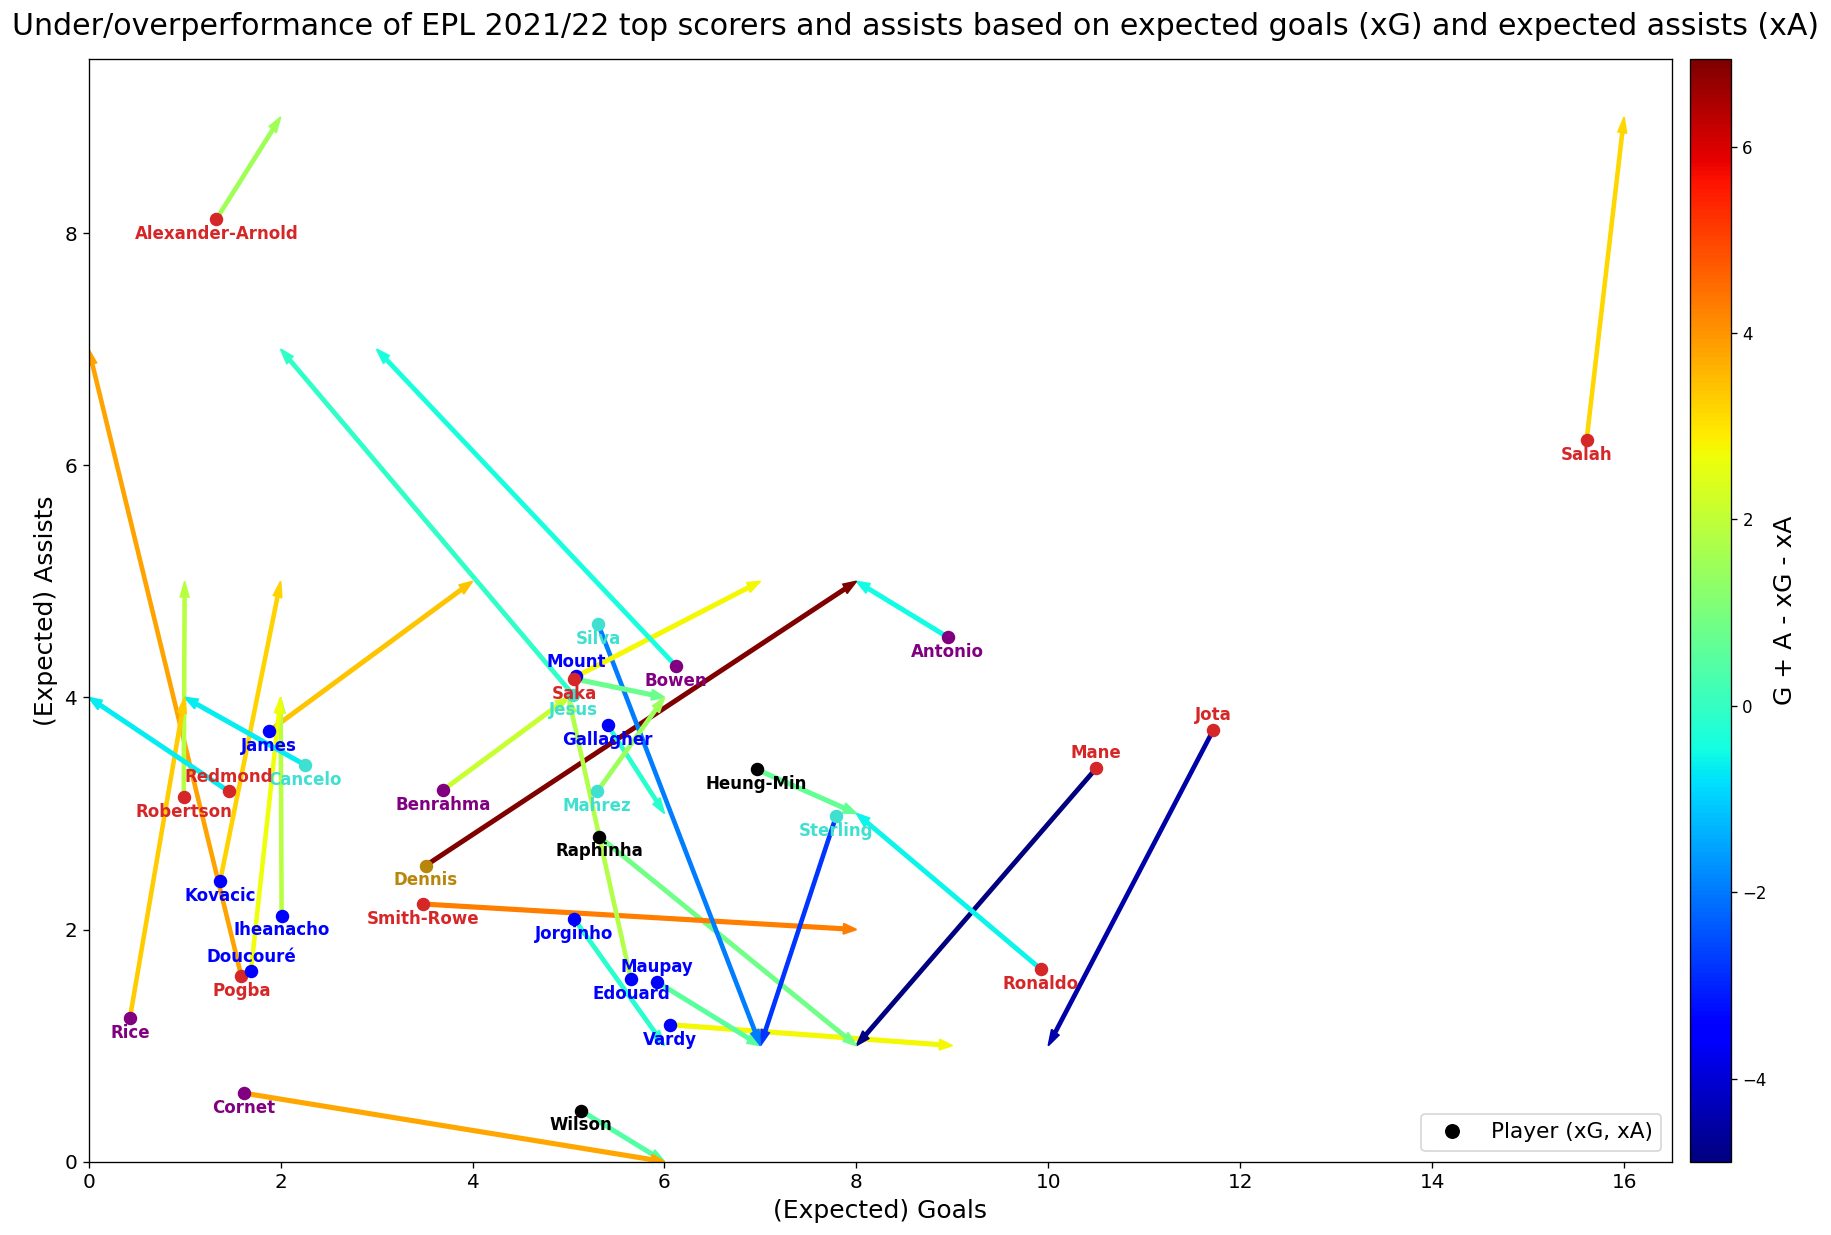

In [ ]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [39, 1]},
                       figsize = [15, 10], dpi = 120, tight_layout = True)
fig.suptitle("Under/overperformance of EPL 2021/22 top scorers and assists based on expected goals (xG) and expected assists (xA)",
             x = 0.5, y = 1,
             ha = 'center', va = 'bottom',
             fontsize = 18)

d = data['dG'] + data['dA']
cmap = plt.cm.jet
cNorm = colors.Normalize(vmin=d.min(), vmax=d.max())
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
plt.colorbar(scalarMap,
             cax=ax[1], orientation='vertical')

ax[1].set_ylabel('G + A - xG - xA', fontsize = 15)

ax[0].set_xlim(left = 0, right = 16.5)
ax[0].set_ylim(bottom = 0, top = 9.5)
ax[0].set_xlabel('(Expected) Goals', fontsize = 15)
ax[0].set_ylabel('(Expected) Assists', fontsize = 15)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=10)


for i in range(len(data.values)):
    if data['Player'][i] not in ['Redmond', 'Doucouré', 'Maupay', 'Mount', 'Mane', 'Jota']:
        ax[0].text(data['xG'][i], data['xA'][i] - 0.05,
                s = data['Player'][i],
                color = team_color[data['Team'][i]],
                fontsize = 10, fontweight = 'bold',
                ha = 'center', va = 'top', zorder = 100)
    else:
        ax[0].text(data['xG'][i], data['xA'][i] + .05,
                s = data['Player'][i],
                color = team_color[data['Team'][i]],
                fontsize = 10, fontweight = 'semibold',
                ha = 'center', va = 'bottom', zorder = 100)

        
    colorVal = scalarMap.to_rgba(data['dG'][i] + data['dA'][i])
    ax[0].arrow(data['xG'][i],
             data['xA'][i],
             data['dG'][i],
             data['dA'][i],
             width = 0.03,
             length_includes_head = True,
             color = colorVal
            #  color = team_color[data['Team'][i]]
             ) 
    ax[0].scatter(data['xG'][i], data['xA'][i], color = team_color[data['Team'][i]], s = 50, zorder = 99)

custom_lines = [Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='black', markersize=10),
                ]
ax[0].legend(custom_lines, ['Player (xG, xA)'], loc = 'lower right', fontsize = 13)


In [ ]:
data['xG'][0]

15.61